In [20]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

* simulate data

In [18]:
np.random.rand(3,1)

array([[0.90963531],
       [0.67548624],
       [0.86150733]])

In [84]:
X=10*np.random.rand(300,1)
y=11+4*X+np.random.randn(300,1)

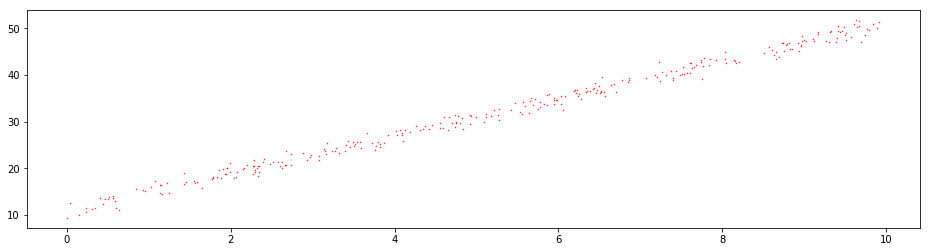

In [85]:
plt.figure(figsize=(16,4))
plt.scatter(X,y, s=0.2, c='r')

### Normal Equation

In [86]:
X_b=np.c_[np.ones((300,1)), X] #add x0=1

In [87]:
X_b[1:3]

array([[1.        , 9.39087524],
       [1.        , 4.59607739]])

In [88]:
theta=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta

array([[10.90386069],
       [ 4.00519606]])

In [89]:
one=np.array([[1],[9]])
one

array([[1],
       [9]])

In [90]:
new_one=np.c_[np.ones((2,1)),one]
new_one

array([[1., 1.],
       [1., 9.]])

In [91]:
pred=new_one.dot(theta)
pred

array([[14.90905675],
       [46.95062524]])

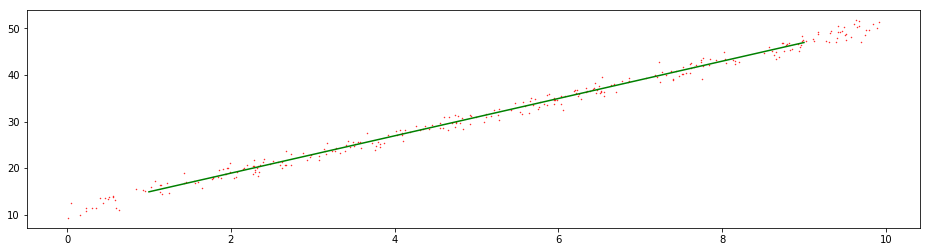

In [92]:
plt.figure(figsize=(16,4))
plt.plot(one, pred, 'g-')
plt.scatter(X,y, s=0.2, c='r')

In [93]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)
model.intercept_, model.coef_

(array([10.90386069]), array([[4.00519606]]))

___
### Batch Gradient Descent

In [107]:
eta=0.01 # learning rate
n_iter=2500 # round number
m=300 # instance number

#random init
theta=np.random.randn(2,1)

In [108]:
for iteration in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[10.90368112],
       [ 4.00522303]])

___
### Stochastic Gradient Descent

* situlated annealing

In [210]:
t0,t1=5,50
def learning_schedule(t):
    return t0/(t+t1)

In [211]:
[(i,learning_schedule(i)) for i in range(0,50,5)]

[(0, 0.1),
 (5, 0.09090909090909091),
 (10, 0.08333333333333333),
 (15, 0.07692307692307693),
 (20, 0.07142857142857142),
 (25, 0.06666666666666667),
 (30, 0.0625),
 (35, 0.058823529411764705),
 (40, 0.05555555555555555),
 (45, 0.05263157894736842)]

In [215]:
theta = np.random.randn(2,1)

n_epochs=50
m=300 # instance number
eta=0.01 # learning rate

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        
        gradients=2*xi.T.dot(xi.dot(theta) - yi)
#         eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
theta

array([[10.97827188],
       [ 3.92927845]])